CREATING OWN DATASET

In [ ]:
def screen_capture():
    import pyscreenshot as ImageGrab
    import time
    folder='capture images/9/'
    for i in range(1,101):
        time.sleep(6)
        im=ImageGrab.grab(bbox=(60,180,410,560))
        print("saved",i)
        im.save(folder+str(i)+".png")
screen_capture()
        

IMPORTING NECESSARY LIBRARIES

In [18]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split 


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt    
    

PREPROCESSING OUR DATASET

In [19]:

path='capture images'
images=[]
class_labels=[]
mylist=os.listdir(path)
print(mylist)
noofclasses=len(mylist)
noofclasses

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


10

In [20]:
for x in range(0,noofclasses):
    mypiclist=os.listdir(path+"/"+str(x))
    for y in mypiclist:
        curimg=cv2.imread(path+"/"+str(x)+"/"+y)
        curimg=cv2.resize(curimg,(28,28))
        images.append(curimg)
        class_labels.append(x)
    print(x, end=" ")
print(" ")
        

0 1 2 3 4 5 6 7 8 9  


In [21]:
print(len(images))

1000


In [22]:
images=np.array(images)
class_labels=np.array(class_labels)

images.shape


(1000, 28, 28, 3)

In [23]:
class_labels.shape

(1000,)

SPLITTING DATASET 

In [24]:
x_train,x_test,y_train,y_test=train_test_split(images, class_labels,test_size=0.2)

In [25]:
x_train.shape

(800, 28, 28, 3)

In [26]:
x_test.shape

(200, 28, 28, 3)

In [27]:
noofsamples=[]
for i in range(0,noofclasses):
    print("no of",str(i)+"s",len(np.where(y_train==i)[0]))
    noofsamples.append(len(np.where(y_train==i)[0]))
print(noofsamples)

no of 0s 83
no of 1s 80
no of 2s 82
no of 3s 76
no of 4s 80
no of 5s 77
no of 6s 81
no of 7s 84
no of 8s 81
no of 9s 76
[83, 80, 82, 76, 80, 77, 81, 84, 81, 76]


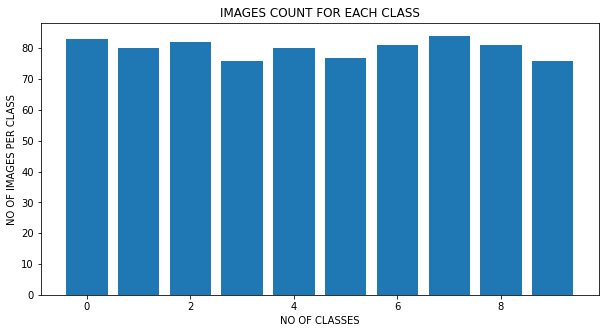

In [28]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noofclasses),noofsamples)
plt.title("IMAGES COUNT FOR EACH CLASS")
plt.xlabel("NO OF CLASSES")
plt.ylabel("NO OF IMAGES PER CLASS")
plt.show()

In [33]:
def preprocess(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img

In [29]:
#img=preprocess(x_train[30])
#img=cv2.resize(img,(200,200))
#cv2.imshow("preprocessed", img)
#cv2.waitKey(0)

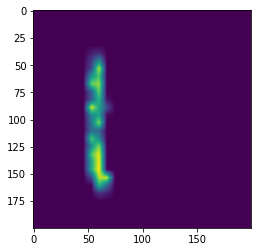

In [34]:
x_train=np.array(list(map(preprocess,x_train)))

img=x_train[60]
img=cv2.resize(img,(200,200))
plt.imshow(img)
#cv2.imshow("preprocessed", img)
#cv2.waitKey(0)

In [35]:
x_test=np.array(list(map(preprocess,x_test)))

In [36]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train.shape

(800, 28, 28, 1)

In [38]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [39]:
x_test.shape

(200, 28, 28, 1)

TRAINING MODEL

In [40]:
input_shape = (28, 28, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (800, 28, 28, 1)
800 train samples
200 test samples


In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(noofclasses, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,batch_size=128,epochs=2500,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('model2.5k.pt')

Epoch 1/2500
7/7 [==============================] - 2s 150ms/step - loss: 1.2388e-06 - accuracy: 1.0000 - val_loss: 0.5009 - val_accuracy: 0.9550
Epoch 2/2500
7/7 [==============================] - 1s 119ms/step - loss: 6.5765e-05 - accuracy: 1.0000 - val_loss: 0.5139 - val_accuracy: 0.9550
Epoch 3/2500
7/7 [==============================] - 1s 127ms/step - loss: 3.5566e-07 - accuracy: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.9600
Epoch 4/2500
7/7 [==============================] - 1s 118ms/step - loss: 8.2998e-08 - accuracy: 1.0000 - val_loss: 0.5259 - val_accuracy: 0.9600
Epoch 5/2500
7/7 [==============================] - 1s 119ms/step - loss: 1.5791e-05 - accuracy: 1.0000 - val_loss: 0.5291 - val_accuracy: 0.9550
Epoch 6/2500
7/7 [==============================] - 1s 118ms/step - loss: 2.9670e-05 - accuracy: 1.0000 - val_loss: 0.5281 - val_accuracy: 0.9550
Epoch 7/2500
7/7 [==============================] - 1s 133ms/step - loss: 1.1817e-06 - accuracy: 1.0000 - val_loss: 0.5242 -

EVALUATION


In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9019799828529358
Test accuracy: 0.9700000286102295


PLOTTING

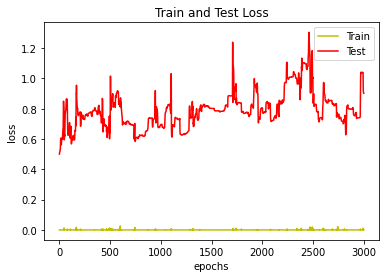

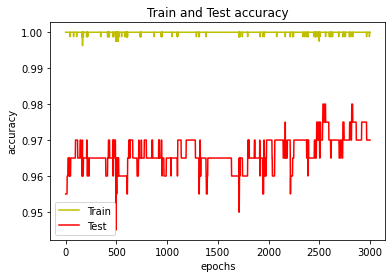

In [48]:
plt.figure(1)
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'y')
plt.plot(epochs, val_loss, 'r')
plt.legend(labels=['Train', 'Test'])
plt.title('Train and Test Loss')
plt.xlabel('epochs')
plt.ylabel('loss')


plt.figure(2)
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs, acc, 'y')
plt.plot(epochs, val_acc, 'r')
plt.legend(labels=['Train', 'Test'])
plt.title('Train and Test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')



plt.show()

PREDICTION PART 1

In [49]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image, ImageOps
import numpy as np

model = load_model('model2k.pt')

def predict_digit(img):
    #img=img.crop((10,0,450,450))
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    
    img=ImageOps.invert(img)
    
    img = img.convert('L')  #convert rgb to grayscale
    #img.show()
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "PREDICT", command =self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "CLEAR", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        x=rect[0]+40
        y=rect[1]+40
        im = ImageGrab.grab((x,y,x+300,y+300))
        #im = ImageGrab.grab(rect)
        #im.show()
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
        

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=10
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()